## 1. Exploring and preparing the data

## Exploring data

### 1.1. BICIMAD. Details of the electric bicycle routes

#### 1.1.1. Columns of the database

**__id**: identificator of the movement

**user_day_code**: user code. For a same date, all the movement of the sale user have the same code.

**idunplug_station**: number of the origin station

**idunplug_base**: number of origin base

**idplug_station**: number of destination station

**idplug_base**: number of destionation base

**unplug_hourTime**: time the bicycle is picked up

**travel_time**: time in seconds of the ride

**track**: detail of the ride (GeoJSON)

**user_type**: type of user: 

    - 0: not defined
    - 1: anual user
    - 2: ocasional user
    - 3: worker of bicimad
    
**ageRange**: age range of the user:

    - 0: not defined
    - 1: between 0 and 16 years
    - 2: between 17 and 18 years
    - 3: between 19 and 26 years
    - 4: between 27 and 40 years
    - 5: between 41 and 65 years
    - 6: more than 65 years
    
**zip_code**: postal code of the user

#### 1.1.2.Read the data

In [2]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

First, we are going to understand the data and obtain conclussions for the movements of june 2021

In [3]:
movements = pd.read_json('202106_movements.json', lines=True)

In [4]:
movements.head()

,_id,user_day_code,idplug_base,user_type,idunplug_base,travel_time,idunplug_station,ageRange,idplug_station,unplug_hourTime,zip_code
0,{'$oid': '60bbf3f21b91311d90d568ad'},b67ea824acf706087d5818ebc6f90821a5abaab17a0868...,15,1,13,319,38,0,54,2021-06-01T00:00:00Z,
1,{'$oid': '60bbf3f21b91311d90d568b2'},364b1b99f1f9a1748f7abf1134c8d6a46197b583649308...,7,1,1,386,185,0,126,2021-06-01T00:00:00Z,
2,{'$oid': '60bbf3f21b91311d90d568b3'},5cc17031cba02835dda4b6c153b56572beaade54d8ab91...,14,1,10,465,15,0,91,2021-06-01T00:00:00Z,
3,{'$oid': '60bbf3f21b91311d90d568b4'},6e855acaaa17d6d14236598c0f1172c783e16950e39c01...,8,1,22,613,84,0,236,2021-06-01T00:00:00Z,
4,{'$oid': '60bbf3f21b91311d90d568b5'},e93417502d55208995a61f4177956ab9289aba39044ce3...,1,1,4,751,131,5,94,2021-06-01T00:00:00Z,28006


In [5]:
movements.describe()

,idplug_base,user_type,idunplug_base,travel_time,idunplug_station,ageRange,idplug_station
count,413370.000000,413370.000000,413370.000000,4.133700e+05,413370.000000,413370.000000,413370.000000
mean,12.388069,1.136778,12.373503,1.031460e+03,123.489501,1.900068,123.487662
std,7.556949,0.652830,7.540467,5.456637e+03,75.771675,2.199646,75.628880
min,1.000000,1.000000,1.000000,0.000000e+00,1.000000,0.000000,1.000000
25%,5.000000,1.000000,5.000000,4.800000e+02,57.000000,0.000000,56.000000
50%,12.000000,1.000000,12.000000,7.330000e+02,122.000000,0.000000,122.000000
75%,19.000000,1.000000,19.000000,1.086000e+03,185.000000,4.000000,185.000000
max,30.000000,7.000000,30.000000,1.708423e+06,2009.000000,6.000000,2009.000000


##### Number of rides per age

In [6]:
#First, we define the age ranges
age_Range_dic = {0: 'not defined', 1: '0 - 16 years', 2: '17 - 18 years', 
             3: '19 - 26 years',4: '27 - 40 years', 5: '41 - 65 years',
             6: ' more 65 years'}

age_Range = pd.DataFrame([[key, age_Range_dic[key]] for key in age_Range_dic.keys()], columns = ['id', 'range'])
age_Range

,id,range
0,0,not defined
1,1,0 - 16 years
2,2,17 - 18 years
3,3,19 - 26 years
4,4,27 - 40 years
5,5,41 - 65 years
6,6,more 65 years


In [7]:
rides_per_age = movements.groupby('ageRange')['user_type'].count().reset_index()

number_rides_age = rides_per_age.merge(age_Range, how='inner', left_on = 'ageRange', right_on='id')
number_rides_age = number_rides_age[number_rides_age['ageRange']!= 0]

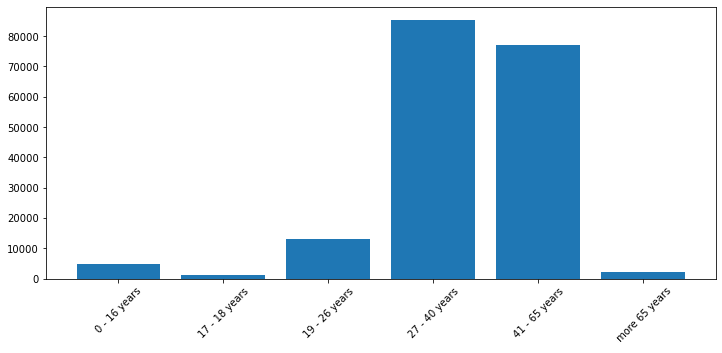

In [8]:
##number of rides per age
plt.figure(figsize=(12,5))
plt.bar(number_rides_age['range'], height = number_rides_age['user_type']);
plt.xticks(rotation=45);

##### Number of rides per origin station

In [9]:
rides_per_origin = movements.groupby('idunplug_station')['user_type'].count().reset_index()
rides_per_origin_station = rides_per_origin.sort_values(by='user_type', ascending = False)

In [12]:
### To identify the stations, we need to merge the data 'rides_per_origin' with another table that tell us the station

In [55]:
stations = pd.read_json('202106.json', lines=True)

In [56]:
stations.head()

,_id,stations
0,2021-06-01T00:43:39.688214,"[{'activate': 1, 'name': 'Puerta del Sol A', '..."
1,2021-06-01T01:43:41.872092,"[{'activate': 1, 'name': 'Puerta del Sol A', '..."
2,2021-06-01T02:43:42.969250,"[{'activate': 1, 'name': 'Puerta del Sol A', '..."
3,2021-06-01T03:43:44.600717,"[{'activate': 1, 'name': 'Puerta del Sol A', '..."
4,2021-06-01T04:43:45.629938,"[{'activate': 1, 'name': 'Puerta del Sol A', '..."


In [57]:
stations = stations['stations'][0]

In [58]:
stations = pd.DataFrame(stations)
stations

,activate,name,reservations_count,light,total_bases,free_bases,number,longitude,no_available,address,latitude,dock_bikes,id
0,1,Puerta del Sol A,0,0,30,26,1a,-3.7018341,0,Puerta del Sol nº 1,40.4172137,3,1
1,1,Puerta del Sol B,0,0,30,28,1b,-3.701602938060457,0,Puerta del Sol nº 1,40.41731271011562,2,2
2,1,Miguel Moya,0,0,24,20,2,-3.7058415,0,Calle Miguel Moya nº 1,40.4205886,1,3
3,1,Plaza Conde Suchil,0,1,18,2,3,-3.7069171,0,Plaza del Conde del Valle de Súchil nº 3,40.4302937,12,4
4,1,Malasaña,0,2,24,15,4,-3.7025875,0,Calle Manuela Malasaña nº 5,40.4285524,7,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,1,INEF,0,2,24,7,257,-3.72997,0,Avenida Juan de Herrera frente a la calle Paul...,40.43896,13,265
260,1,Ciudad Universitaria 1,0,0,24,23,258,-3.72699,0,Avenida de la Complutense (Metro Ciudad Univer...,40.44375,0,266
261,1,Ciudad Universitaria 2,0,0,24,21,259,-3.72693,0,Avenida de la Complutense (Metro Ciudad Univer...,40.44342,1,267
262,1,Facultad Biología,0,0,24,20,260,-3.72731,0,Calle José Antonio Novais frente al nº 12,40.44912,3,268


In [15]:
stations = stations[['name', 'id']]
stations

,name,id
0,Puerta del Sol A,1
1,Puerta del Sol B,2
2,Miguel Moya,3
3,Plaza Conde Suchil,4
4,Malasaña,5
...,...,...
259,INEF,265
260,Ciudad Universitaria 1,266
261,Ciudad Universitaria 2,267
262,Facultad Biología,268


In [16]:
rides_origin = rides_per_origin_station.merge(stations, how='inner', left_on='idunplug_station', right_on = 'id')
rides_origin = rides_origin.head(30)

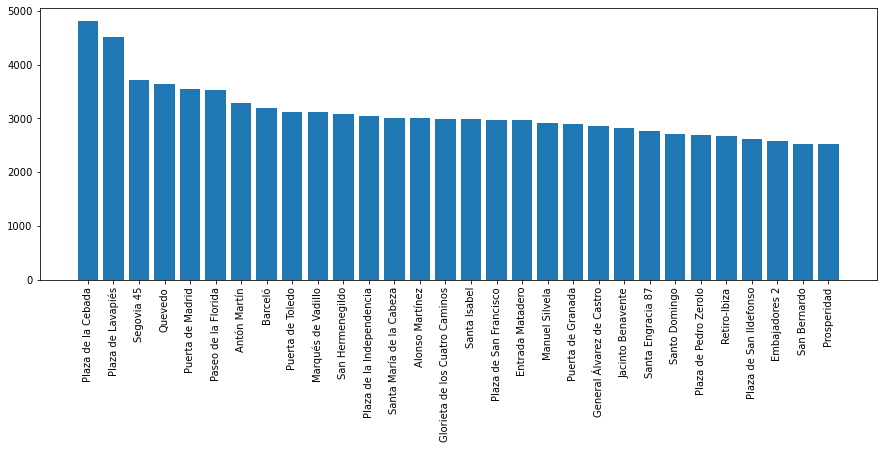

In [17]:
#plot: 30 stations with the most
plt.figure(figsize=(15,5))
plt.bar(rides_origin['name'], height = rides_origin['user_type']);
plt.xticks(rotation=90);

##### 1.1.3. Distribution of the demand of bycycles per day and hour

We use the column ***'unplug_hourTime'***. This columns has the format of the hour zone in ISO-8601 format

In [18]:
#!pip install iso8601
import iso8601

In [19]:
movements['unplug_hourTime'] = pd.to_datetime(movements['unplug_hourTime'].apply(iso8601.parse_date))
movements['unplug_hourTime']

0        2021-06-01 00:00:00+00:00
1        2021-06-01 00:00:00+00:00
2        2021-06-01 00:00:00+00:00
3        2021-06-01 00:00:00+00:00
4        2021-06-01 00:00:00+00:00
                    ...           
413365   2021-06-27 19:00:00+00:00
413366   2021-06-28 07:00:00+00:00
413367   2021-06-25 15:00:00+00:00
413368   2021-06-30 08:00:00+00:00
413369   2021-06-29 13:00:00+00:00
Name: unplug_hourTime, Length: 413370, dtype: datetime64[ns, UTC]

In [20]:
movements['date'] = movements['unplug_hourTime'].dt.date
movements['date']

0         2021-06-01
1         2021-06-01
2         2021-06-01
3         2021-06-01
4         2021-06-01
             ...    
413365    2021-06-27
413366    2021-06-28
413367    2021-06-25
413368    2021-06-30
413369    2021-06-29
Name: date, Length: 413370, dtype: object

In [21]:
movements['hour'] = movements['unplug_hourTime'].dt.time
movements['hour']

0         00:00:00
1         00:00:00
2         00:00:00
3         00:00:00
4         00:00:00
            ...   
413365    19:00:00
413366    07:00:00
413367    15:00:00
413368    08:00:00
413369    13:00:00
Name: hour, Length: 413370, dtype: object

In [22]:
from datetime import datetime
from datetime import date
import calendar

In [23]:
movements['date'] = pd.to_datetime(movements['date'])
movements['day_of_week'] = movements['date'].dt.day_name()
movements['day_of_week_number'] = movements['date'].dt.dayofweek

In [24]:
movements['day_of_week']

0           Tuesday
1           Tuesday
2           Tuesday
3           Tuesday
4           Tuesday
            ...    
413365       Sunday
413366       Monday
413367       Friday
413368    Wednesday
413369      Tuesday
Name: day_of_week, Length: 413370, dtype: object

In [25]:
### number of rides per day of week
rides_per_weekday = movements.groupby(['day_of_week', 'day_of_week_number'])['user_type'].count().reset_index()
rides_per_weekday = rides_per_weekday.sort_values(by = 'day_of_week_number')
rides_per_weekday

,day_of_week,day_of_week_number,user_type
1,Monday,0,56169
5,Tuesday,1,75096
6,Wednesday,2,78371
4,Thursday,3,61723
0,Friday,4,61031
2,Saturday,5,43727
3,Sunday,6,37253


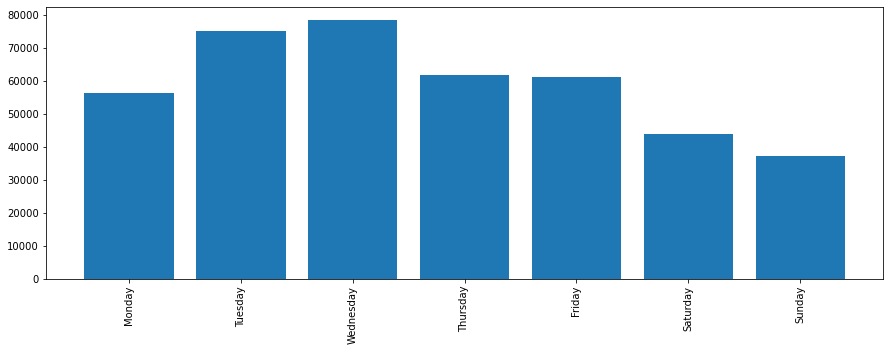

In [26]:
#plot: rides per day of week
plt.figure(figsize=(15,5))
plt.bar(rides_per_weekday['day_of_week'], height = rides_per_weekday['user_type']);
plt.xticks(rotation=90);

Now, we are going to plot the distribution of the demand by hour of the day

In [27]:
movements

,_id,user_day_code,idplug_base,user_type,idunplug_base,travel_time,idunplug_station,ageRange,idplug_station,unplug_hourTime,zip_code,date,hour,day_of_week,day_of_week_number
0,{'$oid': '60bbf3f21b91311d90d568ad'},b67ea824acf706087d5818ebc6f90821a5abaab17a0868...,15,1,13,319,38,0,54,2021-06-01 00:00:00+00:00,,2021-06-01,00:00:00,Tuesday,1
1,{'$oid': '60bbf3f21b91311d90d568b2'},364b1b99f1f9a1748f7abf1134c8d6a46197b583649308...,7,1,1,386,185,0,126,2021-06-01 00:00:00+00:00,,2021-06-01,00:00:00,Tuesday,1
2,{'$oid': '60bbf3f21b91311d90d568b3'},5cc17031cba02835dda4b6c153b56572beaade54d8ab91...,14,1,10,465,15,0,91,2021-06-01 00:00:00+00:00,,2021-06-01,00:00:00,Tuesday,1
3,{'$oid': '60bbf3f21b91311d90d568b4'},6e855acaaa17d6d14236598c0f1172c783e16950e39c01...,8,1,22,613,84,0,236,2021-06-01 00:00:00+00:00,,2021-06-01,00:00:00,Tuesday,1
4,{'$oid': '60bbf3f21b91311d90d568b5'},e93417502d55208995a61f4177956ab9289aba39044ce3...,1,1,4,751,131,5,94,2021-06-01 00:00:00+00:00,28006,2021-06-01,00:00:00,Tuesday,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413365,{'$oid': '60e4d2a51b91313ed4f52e62'},45de608bddfda3f468ef6093c65f6246a2917ce2376e98...,23,1,3,746,234,0,84,2021-06-27 19:00:00+00:00,,2021-06-27,19:00:00,Sunday,6
413366,{'$oid': '60e4d2b91b91313ed4f53f9f'},dbec6f034d41c528fd21412197518fe7d11dd0e863d965...,18,3,1,355190,268,0,268,2021-06-28 07:00:00+00:00,,2021-06-28,07:00:00,Monday,0
413367,{'$oid': '60e4d2d51b91313ed4f551ea'},2081c1c1c6c1d9e400b611bcb244b408da53884dffcbbf...,20,3,8,603181,253,5,253,2021-06-25 15:00:00+00:00,,2021-06-25,15:00:00,Friday,4
413368,{'$oid': '60e4d2d61b91313ed4f55226'},dbec6f034d41c528fd21412197518fe7d11dd0e863d965...,11,3,15,13,243,0,243,2021-06-30 08:00:00+00:00,,2021-06-30,08:00:00,Wednesday,2


In [28]:
movements_by_hour = movements.groupby(['date','hour'])['user_type'].count().reset_index()
movements_by_hour

,date,hour,user_type
0,2021-06-01,00:00:00,31
1,2021-06-01,01:00:00,7
2,2021-06-01,02:00:00,9
3,2021-06-01,03:00:00,39
4,2021-06-01,04:00:00,62
...,...,...,...
715,2021-06-30,19:00:00,816
716,2021-06-30,20:00:00,555
717,2021-06-30,21:00:00,585
718,2021-06-30,22:00:00,514


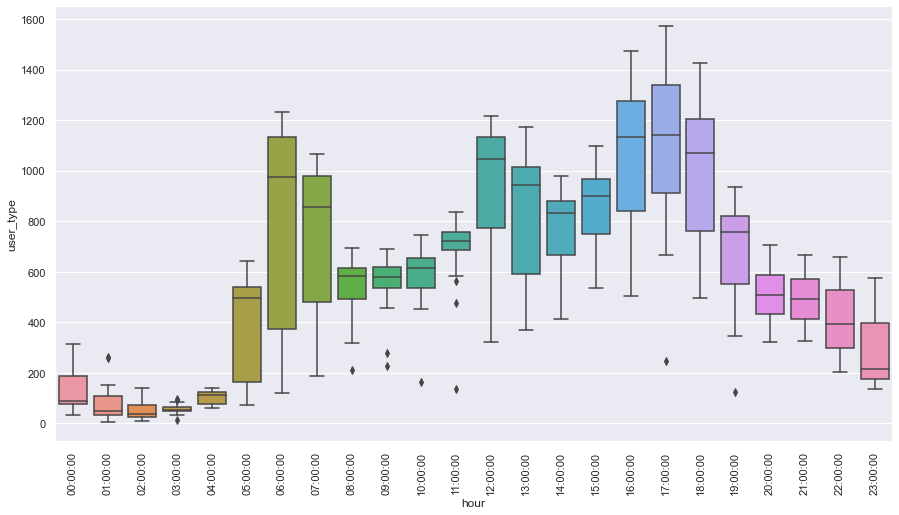

In [29]:
sns.set(rc = {'figure.figsize': (15,8)})
ax = sns.boxplot(x='hour', y = 'user_type', data = movements_by_hour);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

Now, we are going to plot the demand of bicycles per hour, ignoring the type of user 3 (worker of bicimad), to understand the real demand of the service

In [30]:
movements_clients = movements[movements['user_type'] != 3]

In [31]:
movements_clients_by_hour = movements_clients.groupby(['date','hour'])['user_type'].count().reset_index()


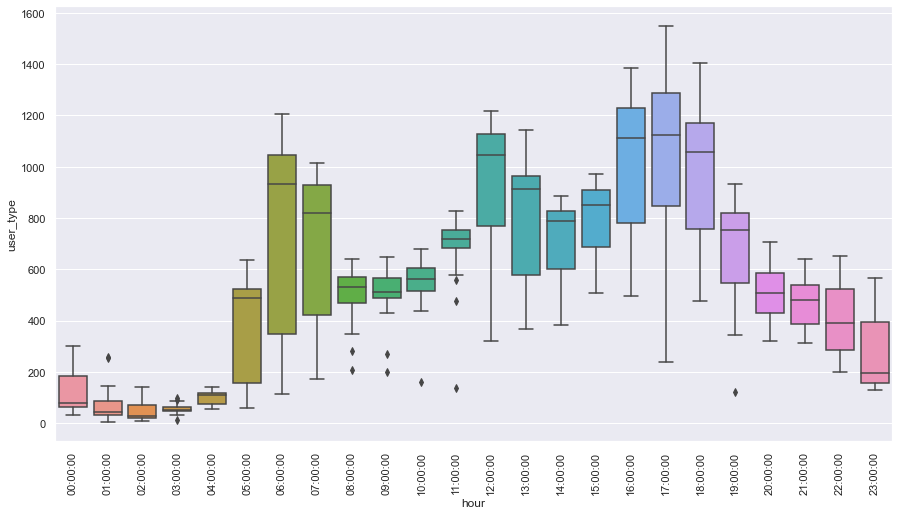

In [32]:
sns.set(rc = {'figure.figsize': (15,8)})
ax = sns.boxplot(x='hour', y = 'user_type', data = movements_clients_by_hour);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

Now, we are going to analyze it taking into account the age of the user

In [33]:
movements_hour_age = movements_clients.groupby(['date','day_of_week','ageRange'])['user_type'].count().reset_index()

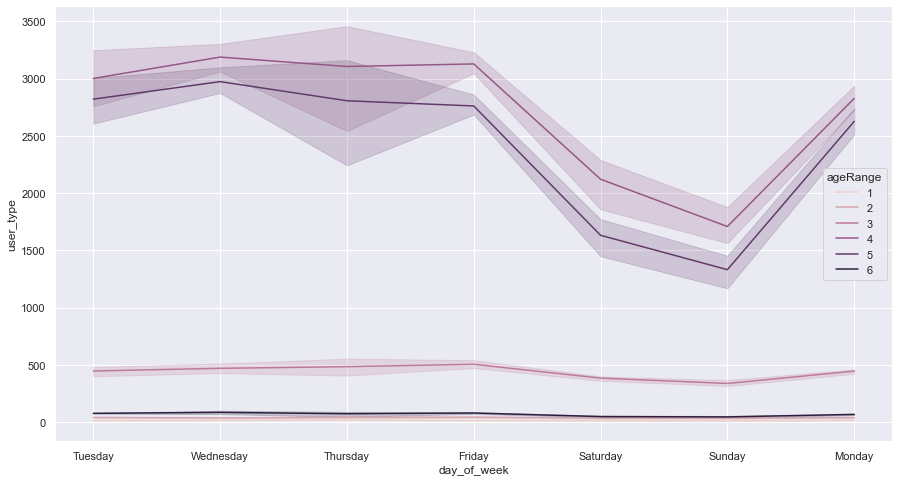

In [34]:
sns.lineplot(x= 'day_of_week', y = 'user_type', hue ='ageRange', 
             data = movements_hour_age[movements_hour_age['ageRange']!=0]);

## Preparing data

We want to analyze the movements of the users of bicimad and predict the demand in order to help the bussiness make decisions and improve their service.

So previous to the modelling, we are going to prepare and filter the data.


#### Movements data

1. We are going to remove the trips made by bicimad workers.

In [36]:
movements = movements[movements['user_type'] != 3]

In [38]:
movements.describe()

,idplug_base,user_type,idunplug_base,travel_time,idunplug_station,ageRange,idplug_station,day_of_week_number
count,398202.000000,398202.000000,398202.000000,398202.000000,398202.000000,398202.000000,398202.000000,398202.000000
mean,12.390405,1.065806,12.366912,982.341385,122.501246,1.890149,122.676443,2.669293
std,7.583481,0.552401,7.564848,1200.904093,74.395866,2.204513,74.722488,1.847311
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,5.000000,1.000000,5.000000,499.000000,56.000000,0.000000,56.000000,1.000000
50%,12.000000,1.000000,12.000000,745.000000,121.000000,0.000000,121.000000,2.000000
75%,19.000000,1.000000,19.000000,1089.000000,184.000000,4.000000,185.000000,4.000000
max,30.000000,7.000000,30.000000,21593.000000,270.000000,6.000000,2009.000000,6.000000


2. We are going to remove the trips whose duration is less than 1 minute and more than 4 hours, considering that these trips are wrong in the table due to errors in the data collection.

In [44]:
movements = movements[(movements['travel_time'] >= 60) & (movements['travel_time'] < 14400)]

In [45]:
movements.describe()

,idplug_base,user_type,idunplug_base,travel_time,idunplug_station,ageRange,idplug_station,day_of_week_number
count,397439.000000,397439.000000,397439.000000,397439.000000,397439.000000,397439.000000,397439.000000,397439.000000
mean,12.391177,1.065587,12.366964,952.680283,122.504477,1.890539,122.660559,2.669184
std,7.584029,0.551467,7.564775,968.117759,74.388739,2.204560,74.719298,1.847248
min,1.000000,1.000000,1.000000,60.000000,1.000000,0.000000,1.000000,0.000000
25%,5.000000,1.000000,5.000000,499.000000,56.000000,0.000000,56.000000,1.000000
50%,12.000000,1.000000,12.000000,744.000000,121.000000,0.000000,121.000000,2.000000
75%,19.000000,1.000000,19.000000,1087.000000,184.000000,4.000000,185.000000,4.000000
max,30.000000,7.000000,30.000000,14362.000000,270.000000,6.000000,2009.000000,6.000000


In [46]:
movements.head()

,_id,user_day_code,idplug_base,user_type,idunplug_base,travel_time,idunplug_station,ageRange,idplug_station,unplug_hourTime,zip_code,date,hour,day_of_week,day_of_week_number
0,{'$oid': '60bbf3f21b91311d90d568ad'},b67ea824acf706087d5818ebc6f90821a5abaab17a0868...,15,1,13,319,38,0,54,2021-06-01 00:00:00+00:00,,2021-06-01,00:00:00,Tuesday,1
1,{'$oid': '60bbf3f21b91311d90d568b2'},364b1b99f1f9a1748f7abf1134c8d6a46197b583649308...,7,1,1,386,185,0,126,2021-06-01 00:00:00+00:00,,2021-06-01,00:00:00,Tuesday,1
2,{'$oid': '60bbf3f21b91311d90d568b3'},5cc17031cba02835dda4b6c153b56572beaade54d8ab91...,14,1,10,465,15,0,91,2021-06-01 00:00:00+00:00,,2021-06-01,00:00:00,Tuesday,1
3,{'$oid': '60bbf3f21b91311d90d568b4'},6e855acaaa17d6d14236598c0f1172c783e16950e39c01...,8,1,22,613,84,0,236,2021-06-01 00:00:00+00:00,,2021-06-01,00:00:00,Tuesday,1
4,{'$oid': '60bbf3f21b91311d90d568b5'},e93417502d55208995a61f4177956ab9289aba39044ce3...,1,1,4,751,131,5,94,2021-06-01 00:00:00+00:00,28006,2021-06-01,00:00:00,Tuesday,1


#### Stations data

In the document 202106 we have information about the situation of the stations per day and hour, this file contains the following columns:

**id**: code of the base station

**latitude**: latitude of the station in WGS84 format

**longitude**: lenght of the station in WGS84 format

**name**: name of the station

**light**: ocupation of the station:

    - 0: low
    - 1: medium
    - 2: high
    - 3: inactive

**number**: logical designation of the Base Station

**activate**: active station
    - 0: not active
    - 1: active
    
**no_available**: station availability
    - 0: available
    - 1: unavailable

**total_bases**: number of bases of the station

**dock_bikes**: number of docked bicycles

**free_bases**: number of free bases

**reservations_count**: number of active reservations


In [65]:
stations = pd.read_json('202106.json', lines=True)
stations.head()

,_id,stations
0,2021-06-01T00:43:39.688214,"[{'activate': 1, 'name': 'Puerta del Sol A', '..."
1,2021-06-01T01:43:41.872092,"[{'activate': 1, 'name': 'Puerta del Sol A', '..."
2,2021-06-01T02:43:42.969250,"[{'activate': 1, 'name': 'Puerta del Sol A', '..."
3,2021-06-01T03:43:44.600717,"[{'activate': 1, 'name': 'Puerta del Sol A', '..."
4,2021-06-01T04:43:45.629938,"[{'activate': 1, 'name': 'Puerta del Sol A', '..."


We want to know the number of total bases available in each stations and the information about the latitude and longitude of them, so we can consider only the first row of the file, because the information we are looking for not depend of the hour and day

In [66]:

stations = stations['stations'][0]
stations = pd.DataFrame(stations)



In [63]:
stations.head()

,activate,name,reservations_count,light,total_bases,free_bases,number,longitude,no_available,address,latitude,dock_bikes,id
0,1,Puerta del Sol A,0,0,30,26,1a,-3.7018341,0,Puerta del Sol nº 1,40.4172137,3,1
1,1,Puerta del Sol B,0,0,30,28,1b,-3.701602938060457,0,Puerta del Sol nº 1,40.41731271011562,2,2
2,1,Miguel Moya,0,0,24,20,2,-3.7058415,0,Calle Miguel Moya nº 1,40.4205886,1,3
3,1,Plaza Conde Suchil,0,1,18,2,3,-3.7069171,0,Plaza del Conde del Valle de Súchil nº 3,40.4302937,12,4
4,1,Malasaña,0,2,24,15,4,-3.7025875,0,Calle Manuela Malasaña nº 5,40.4285524,7,5


#### Work calendar

We are going to use the data of the work calendar in Madrid, so we caracterize each day as weekday / holiday / sunday / saturday, because we are going to study the movements of the users based on this criteria

In [74]:
calendar = pd.read_csv('calendario.csv')
calendar.head()

,Día,Día_semana,laborable / festivo / domingo festivo,Tipo de Festivo,Festividad,Unnamed: 5
0,01/01/2013,martes,festivo,Festivo nacional,Año Nuevo,NaN
1,02/01/2013,miércoles,laborable,NaN,NaN,NaN
2,03/01/2013,jueves,laborable,NaN,NaN,NaN
3,04/01/2013,viernes,laborable,NaN,NaN,NaN
4,05/01/2013,sábado,sábado,NaN,NaN,NaN


In [81]:

calendar['date'] = pd.to_datetime(calendar['Día'])
calendar = calendar[['date', 'laborable / festivo / domingo festivo']]

In [84]:
movements.merge(calendar, how='inner', left_on='date', right_on = 'date')


,_id,user_day_code,idplug_base,user_type,idunplug_base,travel_time,idunplug_station,ageRange,idplug_station,unplug_hourTime,zip_code,date,hour,day_of_week,day_of_week_number,laborable / festivo / domingo festivo
0,{'$oid': '60bbf3f21b91311d90d568ad'},b67ea824acf706087d5818ebc6f90821a5abaab17a0868...,15,1,13,319,38,0,54,2021-06-01 00:00:00+00:00,,2021-06-01,00:00:00,Tuesday,1,festivo
1,{'$oid': '60bbf3f21b91311d90d568b2'},364b1b99f1f9a1748f7abf1134c8d6a46197b583649308...,7,1,1,386,185,0,126,2021-06-01 00:00:00+00:00,,2021-06-01,00:00:00,Tuesday,1,festivo
2,{'$oid': '60bbf3f21b91311d90d568b3'},5cc17031cba02835dda4b6c153b56572beaade54d8ab91...,14,1,10,465,15,0,91,2021-06-01 00:00:00+00:00,,2021-06-01,00:00:00,Tuesday,1,festivo
3,{'$oid': '60bbf3f21b91311d90d568b4'},6e855acaaa17d6d14236598c0f1172c783e16950e39c01...,8,1,22,613,84,0,236,2021-06-01 00:00:00+00:00,,2021-06-01,00:00:00,Tuesday,1,festivo
4,{'$oid': '60bbf3f21b91311d90d568b5'},e93417502d55208995a61f4177956ab9289aba39044ce3...,1,1,4,751,131,5,94,2021-06-01 00:00:00+00:00,28006,2021-06-01,00:00:00,Tuesday,1,festivo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397434,{'$oid': '60e381221b9131285030ee8f'},5087913e7566bbc40b40ac006819fe015eb1e16d1bc760...,12,1,18,500,185,4,134,2021-06-30 11:00:00+00:00,28008,2021-06-30,11:00:00,Wednesday,2,NaN
397435,{'$oid': '60e381241b9131285030f009'},af6f9b9386d70757fe1f99b6fd50c0cc70e5cee052cc4f...,1,1,24,1609,244,0,49,2021-06-30 22:00:00+00:00,,2021-06-30,22:00:00,Wednesday,2,NaN
397436,{'$oid': '60e381241b9131285030f056'},582f80b80a92c09e9d7b3b991cdd621b4b400e87b3b221...,13,1,2,1535,207,0,197,2021-06-30 16:00:00+00:00,,2021-06-30,16:00:00,Wednesday,2,NaN
397437,{'$oid': '60e3812c1b9131285030f696'},36d40b49fafe4e7f41919089b609debf52f1ee42f3e752...,14,1,20,841,132,5,265,2021-06-30 23:00:00+00:00,28020,2021-06-30,23:00:00,Wednesday,2,NaN


In [85]:
#In the column of 'laborable/festivo/domingo festivo' we have Nans, we are going to fill that numbers with que 

## Final dataset for the project

In [69]:
movements.to_csv('bicimad_data.csv')